In [1]:
pip install dmba

Note: you may need to restart the kernel to use updated packages.


In [11]:
import dmba

In [12]:
%matplotlib inline
from pathlib import Path  # Changed 'path' to 'Path' - correct capitalization
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt   
from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [13]:
name = "Nneka Ekwemuka"

In [14]:
mower_df = pd.read_csv('RidingMowers.csv')

In [15]:
mower_df.head()

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


In [16]:
# use max_depth to control tree size (None = full tree)
classTree = DecisionTreeClassifier(random_state=0,
max_depth=1)

In [17]:
classTree.fit(mower_df.drop(columns=['Ownership']),
mower_df['Ownership'])

DecisionTreeClassifier(max_depth=1, random_state=0)

In [18]:
print("Classes: {}".format(', '.join(classTree.classes_)))

Classes: Nonowner, Owner


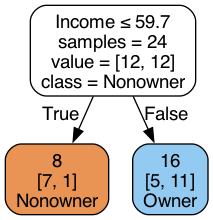

In [21]:
plotDecisionTree(classTree,feature_names=mower_df.columns[:2], class_names=classTree.classes_)

Classes: Nonowner, Owner


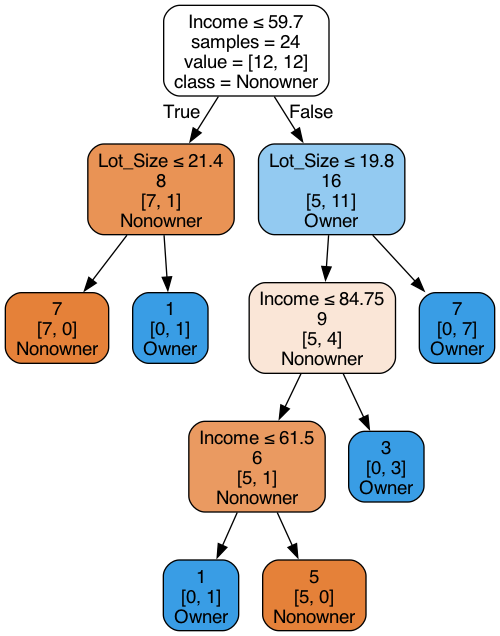

In [22]:
classTree = DecisionTreeClassifier(random_state=0)
classTree.fit(mower_df.drop(columns=['Ownership']),
mower_df['Ownership'])
print("Classes: {}".format(', '.join(classTree.classes_)))
plotDecisionTree(classTree,feature_names=mower_df.columns[:2],
class_names=classTree.classes_)

In [25]:
X = mower_df.drop(columns=['Ownership'])
y = mower_df['Ownership']

In [36]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

In [37]:
fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X, train_y)

DecisionTreeClassifier()

In [38]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual  0  1
     0  8  0
     1  0 11
Confusion Matrix (Accuracy 0.8000)

       Prediction
Actual 0 1
     0 3 1
     1 0 1


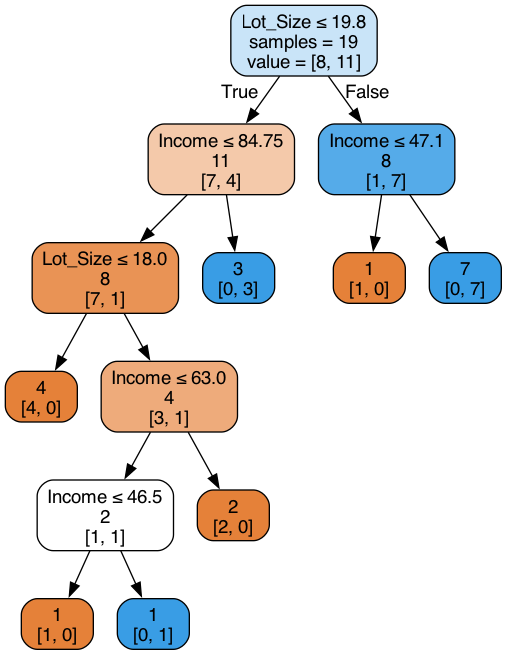

In [39]:
plotDecisionTree(fullClassTree,feature_names=train_X.columns)

In [40]:
# Start with an initial guess for parameters
param_grid = {
'max_depth': [10, 20, 30, 40],
'min_samples_split': [20, 40, 60, 80, 100],
'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
}

In [42]:
# Which values are best?
# n_jobs=-1 will utilize all available CPUs
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1),param_grid, cv=5, n_jobs=-1)

In [43]:
gridSearch.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_impurity_decrease': [0, 0.0005, 0.001, 0.005,
                                                   0.01],
                         'min_samples_split': [20, 40, 60, 80, 100]})

In [44]:
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.5833333333333333
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 20}


In [45]:
# Adapt grid based on result from initial grid search
param_grid = {
'max_depth': list(range(2, 16)), # 14 values
'min_samples_split': list(range(10, 22)), # 11 values
'min_impurity_decrease': [0.0009, 0.001, 0.0011], # 3 values
}

In [46]:
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1),param_grid, cv=5, n_jobs=-1)

In [47]:
gridSearch.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15],
                         'min_impurity_decrease': [0.0009, 0.001, 0.0011],
                         'min_samples_split': [10, 11, 12, 13, 14, 15, 16, 17,
                                               18, 19, 20, 21]})

In [48]:
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)
bestClassTree = gridSearch.best_estimator_

Improved score:  0.5833333333333333
Improved parameters:  {'max_depth': 2, 'min_impurity_decrease': 0.0009, 'min_samples_split': 17}


In [49]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual  0  1
     0  8  0
     1  0 11
Confusion Matrix (Accuracy 0.8000)

       Prediction
Actual 0 1
     0 3 1
     1 0 1


In [53]:
bank_df = pd.read_csv('UniversalBank.csv')

In [54]:
bank_df.drop(columns=['ID', 'ZIP Code'], inplace=True)

In [55]:
X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']

In [56]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y,
test_size=0.4, random_state=1)

In [57]:
rf = RandomForestClassifier(n_estimators=500,random_state=1)

In [58]:
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

In [59]:
# variable (feature) importance plot
importances = rf.feature_importances_

In [60]:
std = np.std([tree.feature_importances_ for tree in
rf.estimators_], axis=0)

In [61]:
df = pd.DataFrame({'feature': train_X.columns,
'importance': importances, 'std': std})

In [62]:
df = df.sort_values('importance')

In [63]:
print(df)

               feature  importance       std
7   Securities Account    0.003882  0.004752
9               Online    0.006406  0.005354
10          CreditCard    0.007642  0.006951
6             Mortgage    0.034209  0.023448
1           Experience    0.035575  0.016021
0                  Age    0.036275  0.015869
8           CD Account    0.057934  0.043198
3               Family    0.111388  0.053174
4                CCAvg    0.171907  0.102980
5            Education    0.200715  0.100976
2               Income    0.334067  0.129097


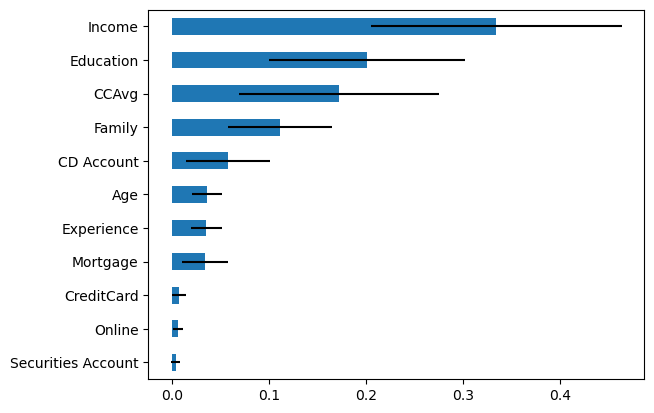

In [64]:
ax = df.plot(kind='barh', xerr='std', x='feature',
legend=False)
ax.set_ylabel('')
plt.show()

In [65]:
boost = GradientBoostingClassifier()

In [66]:
boost.fit(train_X, train_y)

GradientBoostingClassifier()

In [67]:
classificationSummary(valid_y, boost.predict(valid_X))

Confusion Matrix (Accuracy 0.9835)

       Prediction
Actual    0    1
     0 1799    8
     1   25  168


In [ ]:
##########END############